In [1]:
library("BSgenome.Hsapiens.UCSC.hg19")

Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: Biostrings

L

In [2]:
library(MethylSeekR)

Loading required package: parallel

Loading required package: mhsmm

Loading required package: mvtnorm



In [3]:
set.seed(123)

In [4]:
sLengths=seqlengths(Hsapiens)
head(sLengths)

chr1      chr2      chr3      chr4      chr5      chr6 
249250621 243199373 198022430 191154276 180915260 171115067

In [5]:
# methFname <- system.file("extdata", "HCG.filtered.sorted.combined.tab", package="MethylSeekR")

In [6]:
meth.gr <- readMethylome(FileName="/home/kevin/DNA-Methylation-patterns/pmd_reg/HCG.filtered.sorted.combined.tab", seqLengths=sLengths)

reading methylome data

Warning message in readMethylome(FileName = "/home/kevin/DNA-Methylation-patterns/pmd_reg/HCG.filtered.sorted.combined.tab", :
“We do not recommend the use of MethylSeekR
for methylomes with mean coverage < 10X
(mean coverage of CpGs with at least one read: 4.4)”


In [7]:
meth.gr

GRanges object with 15257264 ranges and 2 metadata columns:
             seqnames    ranges strand |         T         M
                <Rle> <IRanges>  <Rle> | <numeric> <numeric>
         [1]     chr1     13078      * |         3         1
         [2]     chr1     15190      * |         4         3
         [3]     chr1     15208      * |         5         5
         [4]     chr1     15240      * |         5         5
         [5]     chr1     15379      * |         4         4
         ...      ...       ...    ... .       ...       ...
  [15257260]     chrY  59031885      * |         3         0
  [15257261]     chrY  59032556      * |         4         0
  [15257262]     chrY  59032716      * |         3         0
  [15257263]     chrY  59033023      * |         5         2
  [15257264]     chrY  59033030      * |         5         1
  -------
  seqinfo: 298 sequences from an unspecified genome

determining alpha distribution for chromosome: chr22



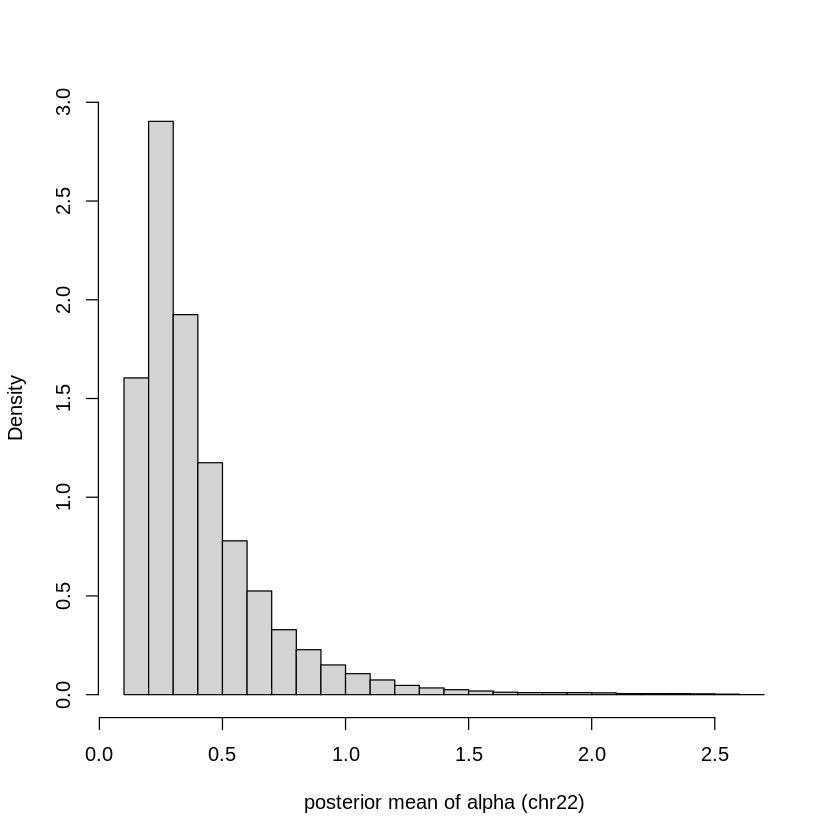

In [8]:
plotAlphaDistributionOneChr(m=meth.gr, chr.sel="chr22", num.cores=32)

training PMD-HMM on chromosome chr22

performing viterbi segmentation

creating GRanges object



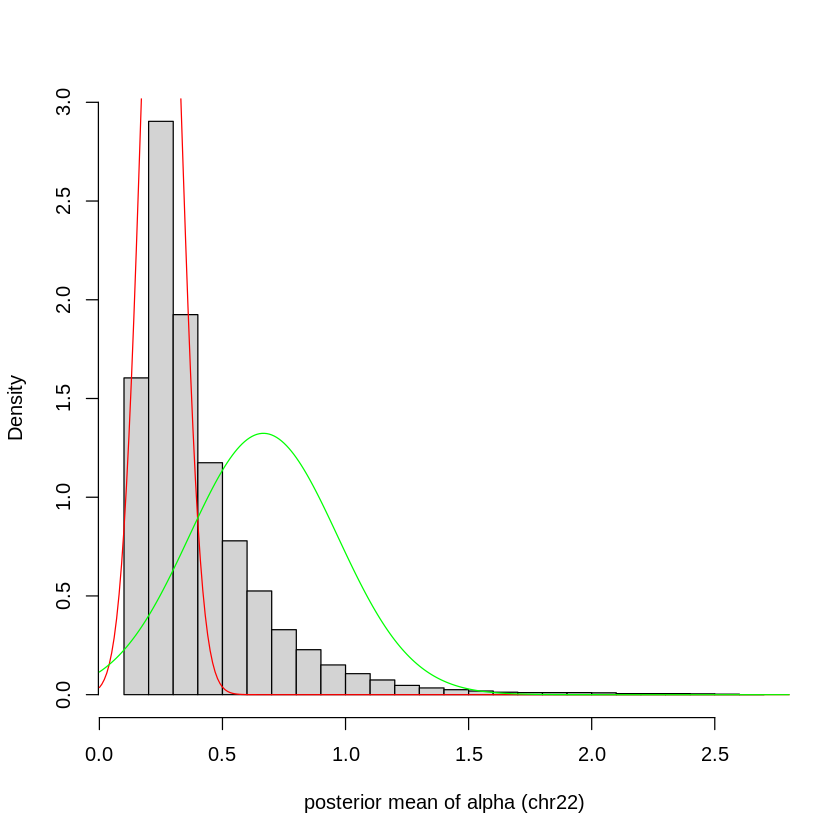

In [9]:
PMDsegments.gr <- segmentPMDs(m=meth.gr, chr.sel="chr22", seqLengths=sLengths, num.cores=32)

In [10]:
PMDsegments.gr

GRanges object with 18129 ranges and 2 metadata columns:
          seqnames            ranges strand |        type       nCG
             <Rle>         <IRanges>  <Rle> | <character> <integer>
      [1]     chr1          1-713126      * |         PMD       398
      [2]     chr1     713127-834702      * |      notPMD       948
      [3]     chr1     834703-870843      * |         PMD       452
      [4]     chr1     870844-898835      * |      notPMD       353
      [5]     chr1     898836-951659      * |         PMD       605
      ...      ...               ...    ... .         ...       ...
  [18125]     chrY  6982858-21135791      * |      notPMD     12345
  [18126]     chrY 21135792-21249312      * |         PMD       187
  [18127]     chrY 21249313-22623419      * |      notPMD      1521
  [18128]     chrY 22623420-22734835      * |         PMD       112
  [18129]     chrY 22734836-59373566      * |      notPMD      3105
  -------
  seqinfo: 298 sequences from an unspecified geno

determining alpha distribution for chromosome: chr22



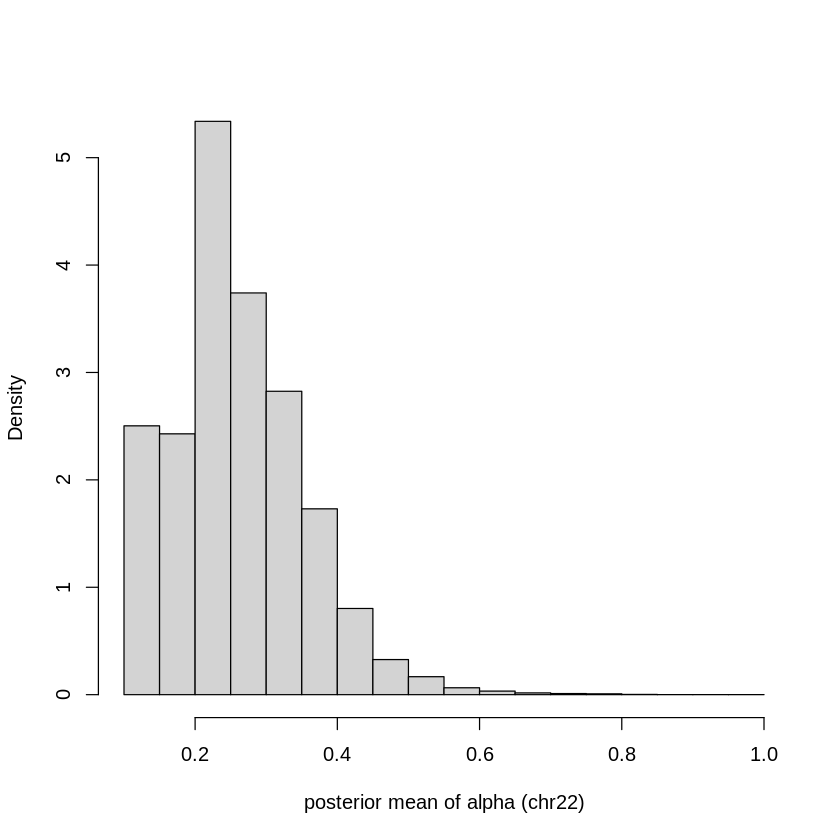

In [11]:
plotAlphaDistributionOneChr(m=subsetByOverlaps(meth.gr, PMDsegments.gr[values(PMDsegments.gr)$type=="notPMD"]), chr.sel="chr22", num.cores=32)

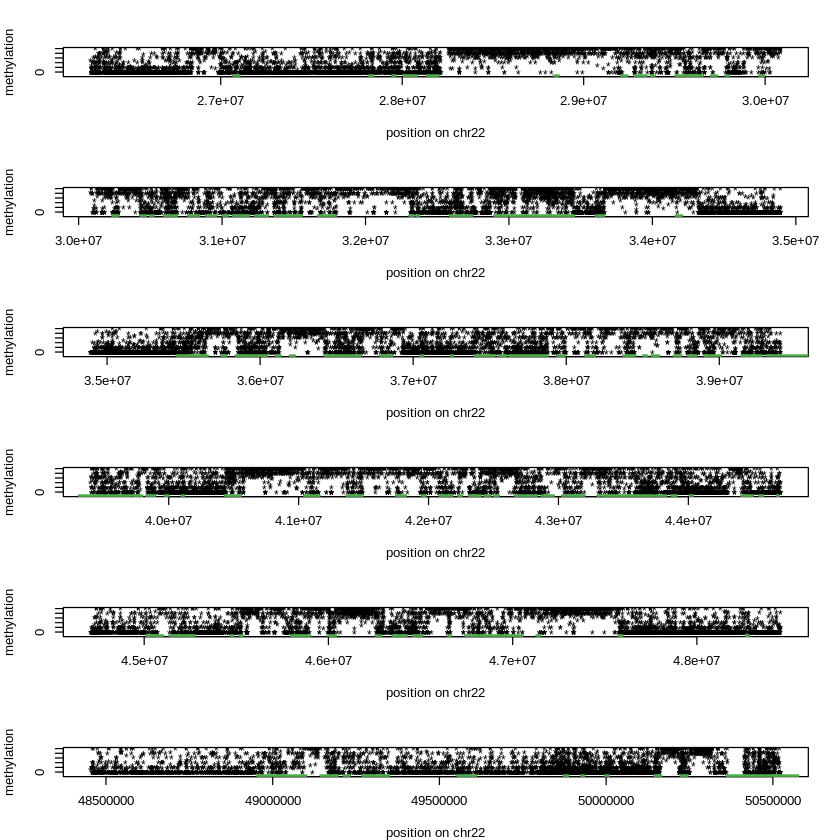

In [12]:
plotPMDSegmentation(m=meth.gr, segs=PMDsegments.gr)